# Cheuk Hin, Lee (Moses) U81885848 Homework 1

# Stack Overflow

## Introduction 

In this assignment, we will look at some posts on Stack Overflow during the year of 2015 and measure the similarity of users by looking at the types of questions they answer. Do not delete the output of your code cells. This assignment is to be completed **INDIVIDUALLY** and it is due on **February 10 at 2:00 PM**. No late submission will be accepted. 

Please update the README with your BU username.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/evimaria/CS506-Spring2007/blob/master/02A-Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve some questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs).

In [1]:
import requests
from datetime import datetime

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")

print(response)

<Response [200]>


All dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [2]:
print(response.text)

{"items":[{"tags":["php","mysql","arrays","mysqli"],"owner":{"reputation":181,"user_id":3210431,"user_type":"registered","accept_rate":78,"profile_image":"https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1","display_name":"salep","link":"http://stackoverflow.com/users/3210431/salep"},"is_answered":true,"view_count":242,"accepted_answer_id":27727478,"answer_count":2,"score":0,"last_activity_date":1420071815,"creation_date":1420070458,"question_id":27727385,"link":"http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array","title":"Inserting multiple records into MySQL from an array"},{"tags":["apache-pig"],"owner":{"reputation":6,"user_id":868779,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r=PG","display_name":"Balpreet Pankaj","link":"http://stackoverflow.com/users/868779/balpreet-pankaj"},"is_answered":false,"view_count":738,"answer_count":1,"score":1,"last_activity_date":

It is not possible to read the raw response. Instead, we need to decode the raw response as JSON and use the `json` library to print it.

In [3]:
import json

json_response = response.json()
#json_response.keys() 'quota_max', 'quota_remaining', 'has_more', 'items']
print(json.dumps(json_response, indent=2))

{
  "items": [
    {
      "creation_date": 1420070458,
      "answer_count": 2,
      "question_id": 27727385,
      "owner": {
        "link": "http://stackoverflow.com/users/3210431/salep",
        "display_name": "salep",
        "user_id": 3210431,
        "reputation": 181,
        "user_type": "registered",
        "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1",
        "accept_rate": 78
      },
      "accepted_answer_id": 27727478,
      "tags": [
        "php",
        "mysql",
        "arrays",
        "mysqli"
      ],
      "title": "Inserting multiple records into MySQL from an array",
      "score": 0,
      "view_count": 242,
      "is_answered": true,
      "link": "http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array",
      "last_activity_date": 1420071815
    },
    {
      "title": "Apache Pig ClassCast exception when loading data with schema",
      "tags": [
        "apache-pig"
      ],
      "question

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

--------

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates. Notice that a JSON object is basically a dictionary. **(5 pts)**

# My Comments

The function below **print_creation_dates_json(resposne)** convert the response into a json object, then it will read the elements below the key **column**. In each of the column, it will print out the creation_date of the object. 

As the creation_data object is stored as a `Unix Time`, I convert the number into `read-able` time scale by using **datetime**. I have also used utc converted to make sure that it displays the right time. This will only display the first page of the creation dates `(100 samples)`


In [4]:
def print_creation_dates_json(response):
    data = response.json()
    column = data["items"]
    #print(column[0]['creation_date'])
    for i in column:
        print(datetime.utcfromtimestamp((i['creation_date'])))
    
print_creation_dates_json(response)
    

2015-01-01 00:00:58
2015-01-01 00:01:43
2015-01-01 00:02:32
2015-01-01 00:02:57
2015-01-01 00:03:31
2015-01-01 00:04:01
2015-01-01 00:05:03
2015-01-01 00:05:27
2015-01-01 00:05:34
2015-01-01 00:06:17
2015-01-01 00:06:41
2015-01-01 00:07:28
2015-01-01 00:07:39
2015-01-01 00:07:46
2015-01-01 00:09:28
2015-01-01 00:10:05
2015-01-01 00:10:29
2015-01-01 00:11:43
2015-01-01 00:12:02
2015-01-01 00:12:55
2015-01-01 00:13:04
2015-01-01 00:13:32
2015-01-01 00:13:50
2015-01-01 00:15:40
2015-01-01 00:17:11
2015-01-01 00:18:50
2015-01-01 00:22:16
2015-01-01 00:23:14
2015-01-01 00:23:50
2015-01-01 00:24:28
2015-01-01 00:25:07
2015-01-01 00:25:29
2015-01-01 00:25:39
2015-01-01 00:26:42
2015-01-01 00:27:01
2015-01-01 00:27:54
2015-01-01 00:28:49
2015-01-01 00:30:43
2015-01-01 00:32:22
2015-01-01 00:32:34
2015-01-01 00:33:17
2015-01-01 00:33:50
2015-01-01 00:34:15
2015-01-01 00:34:41
2015-01-01 00:36:50
2015-01-01 00:37:18
2015-01-01 00:37:47
2015-01-01 00:38:05
2015-01-01 00:39:37
2015-01-01 00:39:39


Write the code that calls the ```print_creation_dates_json()``` function to print out all the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). **(5 pts)**

# My Comment

The function below **DisplayAll(response)** loops over all the pages while the variable `has_more` is true. It will call the print_creation_dates_json() in each loop so that it would produce all the creation dates of question for each page. 

I have also added a feature that displays which page number that it is in, and how many responses there are **(100 samples)** and the creation dates of the repsective page.

In [5]:
import json
def DisplayAll(response):
    Num_page = 1
    has_more = True
    while(has_more==True):
        new_response = requests.get("https://api.stackexchange.com/2.2/questions?page=" + str(Num_page) + 
                                   "&pagesize=100&fromdate=1420070400&"
                                   + "todate=1420156800&order=asc&sort=creation&site=stackoverflow")
        print("\nPage Number:",Num_page,",","Number of Response:",response,":")
        has_more = new_response.json()["has_more"]
        print_creation_dates_json(new_response)
        Num_page += 1 
        
DisplayAll(response)


Page Number: 1 , Number of Response: <Response [200]> :
2015-01-01 00:00:58
2015-01-01 00:01:43
2015-01-01 00:02:32
2015-01-01 00:02:57
2015-01-01 00:03:31
2015-01-01 00:04:01
2015-01-01 00:05:03
2015-01-01 00:05:27
2015-01-01 00:05:34
2015-01-01 00:06:17
2015-01-01 00:06:41
2015-01-01 00:07:28
2015-01-01 00:07:39
2015-01-01 00:07:46
2015-01-01 00:09:28
2015-01-01 00:10:05
2015-01-01 00:10:29
2015-01-01 00:11:43
2015-01-01 00:12:02
2015-01-01 00:12:55
2015-01-01 00:13:04
2015-01-01 00:13:32
2015-01-01 00:13:50
2015-01-01 00:15:40
2015-01-01 00:17:11
2015-01-01 00:18:50
2015-01-01 00:22:16
2015-01-01 00:23:14
2015-01-01 00:23:50
2015-01-01 00:24:28
2015-01-01 00:25:07
2015-01-01 00:25:29
2015-01-01 00:25:39
2015-01-01 00:26:42
2015-01-01 00:27:01
2015-01-01 00:27:54
2015-01-01 00:28:49
2015-01-01 00:30:43
2015-01-01 00:32:22
2015-01-01 00:32:34
2015-01-01 00:33:17
2015-01-01 00:33:50
2015-01-01 00:34:15
2015-01-01 00:34:41
2015-01-01 00:36:50
2015-01-01 00:37:18
2015-01-01 00:37:47
201

Due to time constraints, we have downloaded the [data dump](http://cs-people.bu.edu/bahargam/506/stackoverflow-posts-2015.tar.gz) for Stack Overflow's posts in 2015. The link is only visible to BU students, so you must be logged in to your BU email. Note that the XML file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. You may want to work with a subset of this data at first, but your solution should be efficient enough to work with the whole dataset. For example, if you call `read()` on the whole dataset, you will get a `MemoryError`.

Do not commit the data file. You may assume that we will place the data file in the same directory as your IPython Notebook, so provide a relative path when loading the data file.

-----------------

Write a function to parse out the questions posted in 2015. These are posts with `PostTypeId=1`. Make a `pandas DataFrame` with 4 columns: `Id`, `CreationDate`, `OwnerUserId`, and the first tag in `Tags`. Print out the DataFrame and do not clear the output. **(10 pts)**

# My Comment

The **get_question()** function takes in the data file **stackoverflow-posts-2015.xml** and loops over the whole file in search for an element where the PostTypeId is 1. Once the PostTypeId is 1, store the first **tag**, the **ID** of the question, the **creation date** of the question and the **OwnerUserId** in a list. Then store this list in a dictionary, in preparation of converting it to a `panda dataframe object`.

Because the panda dataframe object has a different arrangment, I transpose the whole matrix so that it is in the right order. Then I add in the names of the columns, respectively. Lastly, all these information is output to a csv document for later process. 

In [8]:
import pandas as pd
import xml.etree.ElementTree as ET
import time

data = 'stackoverflow-posts-2015.xml'
dictionary = {}
start_time = time.time()

def get_question():
    rank = 0
    for event, element in ET.iterparse(data):
        try:
            Root_PostId = element.attrib['PostTypeId']
            if(Root_PostId == '1'):
                tag = element.attrib['Tags']
                tag = tag.split('>')

                Id = element.attrib['Id']
                creation_date = element.attrib['CreationDate']
                final_tag = tag[0][1:]
                #As OwnerUserId may not exist, it is necessary to check if OwnerDisplayName exist
                try:
                    Owner_user_id = element.attrib['OwnerUserId']
                except KeyError:
                    Owner_user_id = element.attrib['OwnerDisplayName']

                dictionary[rank] = [Id, creation_date, Owner_user_id,final_tag]
                rank += 1
                element.clear()

        except KeyError:
            pass
        
print('get_question() has started')
get_question()
print('get_question() has ended')

df = pd.DataFrame.from_dict(dictionary)
df = df.transpose()
df.columns = ['Id','CreationDate','OwnerUserId','Tag']
df.to_csv('new2_dataframe.csv')
print("--- %s seconds ---" % (time.time() - start_time))
print ('End')

get_question() has started
get_question() has ended
--- 365.63055062294006 seconds ---
End


Below is the demonstration of the panda dataframe object of the **Id**, **CreationDate**, **OwnerUserId**, and the first **tag** of all the questions posted in 2015.

In [9]:
df = pd.read_csv('new2_dataframe.csv')
print (df)

         Unnamed: 0        Id             CreationDate OwnerUserId  \
0                 0  27727385  2015-01-01T00:00:58.253     3210431   
1                 1  27727388  2015-01-01T00:01:43.673      868779   
2                 2  27727391  2015-01-01T00:02:32.123     4372672   
3                 3  27727393  2015-01-01T00:02:57.983     2482149   
4                 4  27727394  2015-01-01T00:03:31.337     4263870   
5                 5  27727396  2015-01-01T00:04:01.407     4409381   
6                 6  27727406  2015-01-01T00:05:03.773      875317   
7                 7  27727407  2015-01-01T00:05:27.167      821742   
8                 8  27727408  2015-01-01T00:05:34.733     2595033   
9                 9  27727409  2015-01-01T00:06:17.720     1815395   
10               10  27727410  2015-01-01T00:06:41.067      541091   
11               11  27727414  2015-01-01T00:07:28.747     1210038   
12               12  27727418  2015-01-01T00:07:39.243     3674356   
13               13 

----------

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 100 users with the most answer posts. Compare the users based on the types of questions they answer. We will categorize a question by its first tag. You may choose to implement any one of the similarity/distance measures we discussed in class. **(30pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/feature_extraction.html) module helpful.

# My Comment

In this section, I have created several functions: **count_all_number()** and **comparsion_match()**

**count_all_number()** is a function that:

1) Loops through the `stackoverflow-posts-2015.xml` file  

2) Find out of the PostTypeId is 2, if it is 2, it is an answer post.

3) Find out the associated ID that responded to this answer post with **OwnerUserId**

4) Store the number of times that a particular ID has responded in a dictionary

5) If that particular ID is already in the dictionary, add 1, so that it increments 

6) If that particular ID is not in the dictionary, create a place for it 


Once the **count_all_number()** function has been called, I store the information in a panda dataframe, and sort it and display only the top 100 of them. Afterwards, I store the top 100 in another csv file called **appearance_count_dataframe.csv**


**comparison_match()** is a function that:

1) Loops through the `stackoverflow-posts-2015.xml` file

2) Check if it is a answer post, such that it is responded by one of the individual in the top 100 user group

3) If it is posted by one of the individual in the top 100 user group, match this user to the tag of that particular answer post

4) I used a dictionary to store the values 

Once the **comparion_match()** function has been called, I store the information in a panda dataframe, and output it as **matchData_dataframe.csv**



In [77]:
import pandas as pd
import xml.etree.ElementTree as ET
import time
from sklearn.feature_extraction.text import CountVectorizer

data = 'stackoverflow-posts-2015.xml'
question_data = pd.read_csv('new2_dataframe.csv')
appearance_count = {}
dictionary = {}
new_dictionary = {}
start_time = time.time()
#counts how many answers a user has posted

def count_all_number():
    for event, element in ET.iterparse(data):
        try:
            Root_PostId = element.attrib['PostTypeId']
            if Root_PostId == "2":
                Owner_user_id = element.attrib["OwnerUserId"]
                if Owner_user_id in appearance_count:
                    appearance_count[Owner_user_id] += 1
                else:
                    appearance_count[Owner_user_id] = 1
                element.clear()
        except KeyError:
            element.clear()
            pass
        
count_all_number()
print('count_all_number progress has started')
# Export all the data out and sort them according to the number of answers
appearance_count = pd.DataFrame(appearance_count,index=[0]).transpose()
appearance_count.columns=['Count']
appearance_count = appearance_count.sort_values('Count', ascending = False)
appearance_count = appearance_count.head(100)
appearance_count.to_csv('appearance_count_dataframe.csv')

def comparison_match():
    for event, element in ET.iterparse(data):
        try:
            Owner_user_id = element.attrib["OwnerUserId"]
            if Owner_user_id in appearance_count.index.values and element.attrib["PostTypeId"] == "2":
                parent_Id = int(element.attrib["ParentId"])
                try:
                    tag = question_data[question_data["Id"] == parent_Id]['Tag'].values[0]
                    if Owner_user_id in new_dictionary:
                        if tag in new_dictionary[Owner_user_id]:
                            new_dictionary[Owner_user_id][tag] += 1
                        else:
                            new_dictionary[Owner_user_id][tag] = 1
                    else:
                        new_dictionary[Owner_user_id] = {tag:1}

                except IndexError:
                    element.clear()
                    pass
                element.clear()

        except KeyError:
            element.clear()
            pass

comparison_match()
print('comparison_match progress has started')

matchData = pd.DataFrame.from_dict(new_dictionary)
matchData.to_csv('matchData_dataframe.csv')
print("--- %s seconds ---" % (time.time() - start_time))
print ('End')

count_all_number progress has started
comparison_match progress has started
--- 1283.0870938301086 seconds ---
End


The table below shows **how many times that all of the individual within the top 100 user group posted in each 'tag' section**

In [121]:
print(matchData)

                      100297  104349  1048572  1126841  114251  1144035  \
.htaccess                NaN     NaN      NaN      NaN     NaN      NaN   
.net                     NaN     NaN      NaN      NaN     NaN      1.0   
.net-3.5                 NaN     NaN      NaN      NaN     NaN      NaN   
64bit                    NaN     NaN      NaN      NaN     NaN      NaN   
abstract-syntax-tree     NaN     NaN      NaN      NaN     NaN      NaN   
accelerometer            NaN     NaN      NaN      NaN     NaN      NaN   
access-vba               NaN     NaN      NaN      NaN     NaN      NaN   
actionscript             NaN     NaN      NaN      NaN     NaN      NaN   
actionscript-3           NaN     NaN      NaN      NaN     NaN      NaN   
active-directory         NaN     NaN      NaN      NaN     NaN      NaN   
ada                      NaN     NaN      NaN      NaN     NaN      NaN   
adapter                  NaN     NaN      NaN      NaN     NaN      NaN   
add-in                   

This function belows **constr_correlation()** is essentially a function that utilies the `Jaccard similarity` concept to see how correlates each individual is to another individual.

It uses the formula that :


$$JSim(x, y) = \frac{|x \cap y|}{|x \cup y|}$$

The function **constr_correlation()** loops through the dictionary that was created in **comparsion_match()** (the result is displayeed in `matchData_dataframe.csv`, I found it easier to work with dictionary, so I continue to use this variable). It calculates the number of intersection and the number of union between one user and another user. Then, it stores all the jaccard similarity value in an array called `c`.

In [93]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
MatchData = pd.read_csv('matchData_dataframe.csv')


new_list = {}
a = []
b = []
c = []
start_time = time.time()

def constr_correlation():
    for key1 in new_dictionary:
        for key2 in new_dictionary:
            b1 = new_dictionary[key1]
            b2 = new_dictionary[key2]
            intersection = len(set(b1).intersection(b2))
            union = len(set(b1).union(b2))
            jac = intersection/union

            a.append(int(key1))
            b.append(int(key2))
            c.append(jac)
            
print('constr_correlation() has started')
constr_correlation()       
print("--- %s seconds ---" % (time.time() - start_time))
print ('End')


constr_correlation() has started
--- 0.11234879493713379 seconds ---
End


The **jaccard similarities** between all individuals are already calculated and I convert these information into a panda dataframe object, in preparation to create a **heatmap**.

Below also displays the jaccard similarity value between `individual A` and `individual B` within the top 100 user group. The data is output as **correlation_data_dataframe.csv**.

In the output below: 

**Pair1  Pair2  Similarity**

**57695  207421  0.066667**

means that the `jaccard similarity value` between individual with userId = **57695** and userId = **207421** has a `jaccard similarity value` of **0.066667**

In [103]:
correlation_data = pd.DataFrame()
correlation_data['Pair1'] = a
correlation_data['Pair2'] = b
correlation_data['Similarity'] = c
correlation_data.set_index('Pair1', inplace=True)
print(correlation_data)

correlation_data.to_csv('correlation_data_dataframe.csv')

          Pair2  Similarity
Pair1                      
57695     57695    1.000000
57695    207421    0.066667
57695   2474656    0.047619
57695   2402272    0.085714
57695     14860    0.047945
57695   3679490    0.085714
57695   1566221    0.111111
57695   1529630    0.000000
57695    139985    0.135593
57695    704848    0.032258
57695   1210329    0.044444
57695   2422776    0.074468
57695   2877241    0.120000
57695    440558    0.093023
57695   1603351    0.038095
57695   1187415    0.113636
57695    501696    0.052632
57695    256970    0.000000
57695    949476    0.000000
57695   2801559    0.083333
57695   1048572    0.072727
57695   4595675    0.042553
57695   3636601    0.053571
57695   3732271    0.107143
57695    505088    0.102941
57695    519413    0.090909
57695   2435473    0.057143
57695   1126841    0.074074
57695    258523    0.059524
57695     15168    0.114754
...         ...         ...
901925  2189127    0.048193
901925     7432    0.111111
901925  1530814    0

-----------------

Plot the distance of the top 100 users using a [heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html). **(10 pts)**

# My Comment

Using the **seaborn.sns.heatmap** function, I plotted the jaccard similarity values of the data

It can be seen there are quite a number of points with a high jaccard similarity value, as indicated with the `green dots` and two nearly **yellow** dot around the middle of the plot. The diagonal line is when a user is compared to itself, so the **jaccard similarity value** is 1.0.

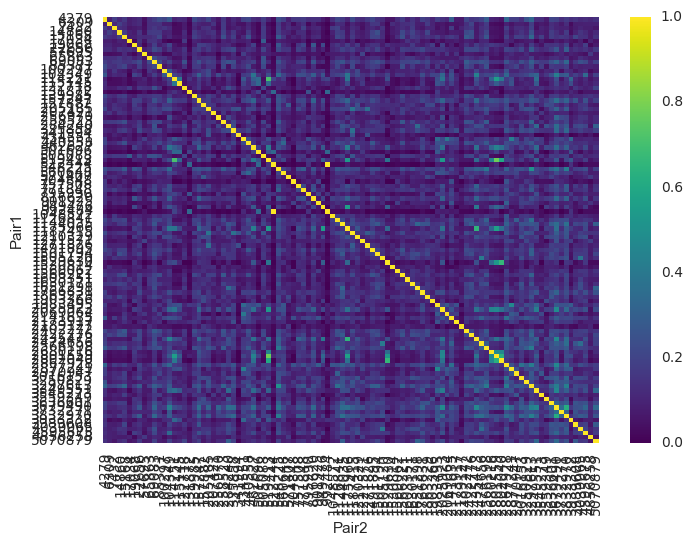

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'Pair1': a, 'Pair2': b, 'Similarity': c})
result = df.pivot(index='Pair1',columns='Pair2',values='Similarity')
sns.heatmap(result, annot=False, fmt="g", cmap='viridis')
plt.show()
